In [1]:
import cirq
import cirq_google

In [4]:
#Init
q0 = cirq.NamedQubit('source')
q1 = cirq.NamedQubit('target')

q3 = cirq.LineQubit(3)
qubits = cirq.GridQubit.square(4)
print(cirq_google.Foxtail)


(0, 0)───(0, 1)───(0, 2)───(0, 3)───(0, 4)───(0, 5)───(0, 6)───(0, 7)───(0, 8)───(0, 9)───(0, 10)
│        │        │        │        │        │        │        │        │        │        │
│        │        │        │        │        │        │        │        │        │        │
(1, 0)───(1, 1)───(1, 2)───(1, 3)───(1, 4)───(1, 5)───(1, 6)───(1, 7)───(1, 8)───(1, 9)───(1, 10)


In [5]:
#Gates
not_gate = cirq.CNOT
pauli_z = cirq.Z

#square root gates
sqrt_x_gate = cirq.X ** .5
sqrt_iswap = cirq.ISWAP**.5

sqrt_sqrt_y = cirq.YPowGate(exponent=0.25)

q0, q1 = cirq.LineQubit.range(2)
z_op = cirq.Z(q0)
not_op = cirq.CNOT(q0, q1)
sqrt_iswap_op = sqrt_iswap(q0, q1)

In [24]:
circuit = cirq.Circuit()
# You can create a circuit by appending to it
circuit.append(cirq.H(q) for q in cirq.LineQubit.range(3))
# All of the gates are put into the same Moment since none overlap
print(circuit)


0: ───H───

1: ───H───

2: ───H───


In [25]:
print(cirq.Circuit(cirq.SWAP(q, q+1) for q in cirq.LineQubit.range(3)))


0: ───×───────────
      │
1: ───×───×───────
          │
2: ───────×───×───
              │
3: ───────────×───


In [26]:
print(cirq.Circuit(cirq.Moment([cirq.H(q)]) for q in cirq.LineQubit.range(3)))


0: ───H───────────

1: ───────H───────

2: ───────────H───


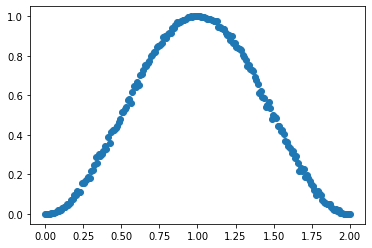

In [27]:
import matplotlib.pyplot as plt
import sympy

# Perform an X gate with variable exponent
q = cirq.GridQubit(1,1)
circuit = cirq.Circuit(cirq.X(q) ** sympy.Symbol('t'),
                       cirq.measure(q, key='m'))

# Sweep exponent from zero (off) to one (on) and back to two (off)
param_sweep = cirq.Linspace('t', start=0, stop=2, length=200)

# Simulate the sweep
s = cirq.Simulator()
trials = s.run_sweep(circuit, param_sweep, repetitions=1000)

# Plot all the results
x_data = [trial.params['t'] for trial in trials]
y_data = [trial.histogram(key='m')[1] / 1000.0 for trial in trials]
plt.scatter('t','p', data={'t': x_data, 'p': y_data})

In [29]:
print('Unitary of the X gate')
print(cirq.unitary(cirq.X))

print('Unitary of SWAP operator on two qubits.')
q0, q1 = cirq.LineQubit.range(2)
print(cirq.unitary(cirq.SWAP(q0, q1)))

print('Unitary of a sample circuit')
print(cirq.unitary(cirq.Circuit(cirq.X(q0), cirq.SWAP(q0, q1))))


Unitary of the X gate
[[0.+0.j 1.+0.j]
 [1.+0.j 0.+0.j]]
Unitary of SWAP operator on two qubits.
[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]]
Unitary of a sample circuit
[[0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]]


In [30]:
swap = cirq.SWAP(cirq.GridQubit(0, 0), cirq.GridQubit(0, 1))
print(cirq.Circuit(swap, device=cirq_google.Foxtail))


(0, 0): ───S^-1───Y^-0.5───@───S^-1───Y^0.5───X^0.5───@───S^-1───X^-0.5───@───S^-1───Z───
                           │                          │                   │
(0, 1): ───Z──────Y^-0.5───@───S^-1───Y^0.5───X^0.5───@───S^-1───X^-0.5───@───S^-1───S───


In [31]:
q=cirq.GridQubit(1, 1)
optimizer=cirq.MergeSingleQubitGates()
c=cirq.Circuit(cirq.X(q) ** 0.25, cirq.Y(q) ** 0.25, cirq.Z(q) ** 0.25)
print(c)
optimizer.optimize_circuit(c)
print(c)


(1, 1): ───X^0.25───Y^0.25───T───
           ┌                           ┐
(1, 1): ───│ 0.5  +0.707j -0.   -0.5j  │───────────
           │ 0.354+0.354j  0.146+0.854j│
           └                           ┘
